In [2]:
import pandas as pd
import numpy as np
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

# Import Data

In [3]:
# load data
df_data = pyreadr.read_r('data.Rda')

# Store using key
df_data = df_data["emailDFrp"]

# Replace T/F w/ 1/0
df_data = df_data.replace(['T', 'F'], [1, 0])

# Store column names as list
cols = list(df_data.columns)

# Change all columns to float
for i in cols:    
    df_data[i] = df_data[i].astype(float)

# Display data
#df_data.head(2)

print("df_data Row Counts: ", df_data.shape[0])
print("df_data Columns Counts: ", df_data.shape[1])
print('')
print('Object Types:')
df_data.dtypes

df_data Row Counts:  9348
df_data Columns Counts:  30

Object Types:


isSpam           float64
isRe             float64
underscore       float64
priority         float64
isInReplyTo      float64
sortedRec        float64
subPunc          float64
multipartText    float64
hasImages        float64
isPGPsigned      float64
subSpamWords     float64
noHost           float64
numEnd           float64
isYelling        float64
isOrigMsg        float64
isDear           float64
isWrote          float64
numLines         float64
bodyCharCt       float64
subExcCt         float64
subQuesCt        float64
numAtt           float64
numRec           float64
perCaps          float64
hour             float64
perHTML          float64
subBlanks        float64
forwards         float64
avgWordLen       float64
numDlr           float64
dtype: object

# EDA

### Show Data

In [4]:
df_data.head(2)

,isSpam,isRe,underscore,priority,isInReplyTo,sortedRec,subPunc,multipartText,hasImages,isPGPsigned,...,subQuesCt,numAtt,numRec,perCaps,hour,perHTML,subBlanks,forwards,avgWordLen,numDlr
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.451039,11.0,0.0,12.5,0.0,4.376623,3.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,7.491289,11.0,0.0,8.0,0.0,4.555556,0.0


### Missing Values

In [5]:
#Sum the number of NaN in each column for offline data
df_nacount = pd.DataFrame(df_data.isnull().sum(axis = 0))

#Rename the count column
df_nacount.rename(columns={0: 'NULL Counts'},inplace=True)

#Create additional calcs
df_nacount['Total Row Count'] = df_data.shape[0]
df_nacount['% Missing'] = round(df_nacount['NULL Counts'] / df_data.shape[0] * 100 , 2)

#Sort Data Frame
df_nacount.sort_values(by=['% Missing'], inplace=True, ascending=False)

df_nacount

,NULL Counts,Total Row Count,% Missing
numRec,282,9348,3.02
subBlanks,20,9348,0.21
subQuesCt,20,9348,0.21
subExcCt,20,9348,0.21
subSpamWords,7,9348,0.07
isYelling,7,9348,0.07
noHost,1,9348,0.01
isSpam,0,9348,0.00
numLines,0,9348,0.00
avgWordLen,0,9348,0.00


### Unique Values in Columns

In [6]:
df_data.nunique()

isSpam              2
isRe                2
underscore          2
priority            2
isInReplyTo         2
sortedRec           2
subPunc             2
multipartText       2
hasImages           2
isPGPsigned         2
subSpamWords        2
noHost              2
numEnd              2
isYelling           2
isOrigMsg           2
isDear              2
isWrote             2
numLines          457
bodyCharCt       3236
subExcCt            8
subQuesCt           8
numAtt              6
numRec             51
perCaps          5201
hour               24
perHTML           885
subBlanks         546
forwards          853
avgWordLen       5020
numDlr             56
dtype: int64

### Data Summary Statistics

In [7]:
df_data.describe()

,isSpam,isRe,underscore,priority,isInReplyTo,sortedRec,subPunc,multipartText,hasImages,isPGPsigned,...,subQuesCt,numAtt,numRec,perCaps,hour,perHTML,subBlanks,forwards,avgWordLen,numDlr
count,9348.000000,9348.000000,9348.000000,9348.000000,9348.000000,9348.000000,9348.000000,9348.000000,9348.000000,9348.000000,...,9328.000000,9348.000000,9066.000000,9348.000000,9348.000000,9348.000000,9328.000000,9348.000000,9348.000000,9348.000000
mean,0.256418,0.321459,0.013479,0.005777,0.298674,0.898588,0.028134,0.035088,0.002353,0.018828,...,0.137757,0.065789,1.929407,8.850371,12.210847,6.517082,13.866939,10.445086,4.487222,1.781558
std,0.436679,0.467062,0.115319,0.075788,0.457701,0.301890,0.165365,0.184011,0.048458,0.135923,...,0.507685,0.324879,5.242396,9.583415,6.623932,19.135266,7.431938,18.263576,0.568582,30.380455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.363072,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,4.255319,8.000000,0.000000,10.526316,0.000000,4.208257,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.055473,13.000000,0.000000,13.253012,0.000000,4.454545,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,9.059399,18.000000,0.000000,15.686275,15.384615,4.728507,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.000000,18.000000,311.000000,100.000000,23.000000,100.000000,86.419753,99.058270,26.000000,1977.000000


### Response Variable for Prediction

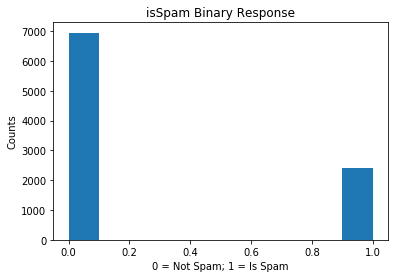

In [8]:
plt.hist(df_data['isSpam'])
plt.title('isSpam Binary Response')
plt.xlabel('0 = Not Spam; 1 = Is Spam')
plt.ylabel('Counts')
plt.show()

### New Data Frame after Removing NULLs

In [9]:
#remove any lines with NULL Values
df_pruned = df_data.dropna(how='any')

#Shape of df_pruned
print('=====Original Data Frame=====')
print("df_data Row Counts: ", df_data.shape[0])
print("df_data Columns Counts: ", df_data.shape[1])
print('')
print('=====Pruned Data Frame=====')
print('df_pruned Row Counts: ', df_pruned.shape[0])
print('df_pruned Columns Counts: ', df_pruned.shape[1])
print('')
print('=====What was removed=====')
print('Count of Rows Removed:', df_data.shape[0] - df_pruned.shape[0])
print('% Rows Removed:', round((df_data.shape[0] - df_pruned.shape[0]) / df_data.shape[0]  * 100, 2))

=====Original Data Frame=====
df_data Row Counts:  9348
df_data Columns Counts:  30

=====Pruned Data Frame=====
df_pruned Row Counts:  9045
df_pruned Columns Counts:  30

=====What was removed=====
Count of Rows Removed: 303
% Rows Removed: 3.24


### SPAM Counts

In [10]:
#Count the Spam Response
df_spam = pd.DataFrame(df_pruned['isSpam'].value_counts())
df_spam['Spam_Response'] = df_spam.index
df_spam['Spam_Response'].replace([1.0, 0.0],['Yes','No'],inplace=True)
df_spam['Total Row Count'] = df_pruned.shape[0]
df_spam['% Response'] = round(df_spam['isSpam'] / df_pruned.shape[0] * 100 , 2)
df_spam.rename(columns={'isSpam': 'Spam_Counts'},inplace=True)
df_spam = df_spam[['Spam_Response', 'Spam_Counts', 'Total Row Count', '% Response']]
df_spam.sort_values(by=['% Response'], inplace=True, ascending=True)

df_spam

,Spam_Response,Spam_Counts,Total Row Count,% Response
1.0,Yes,2371,9045,26.21
0.0,No,6674,9045,73.79


### Correlation Heatmap

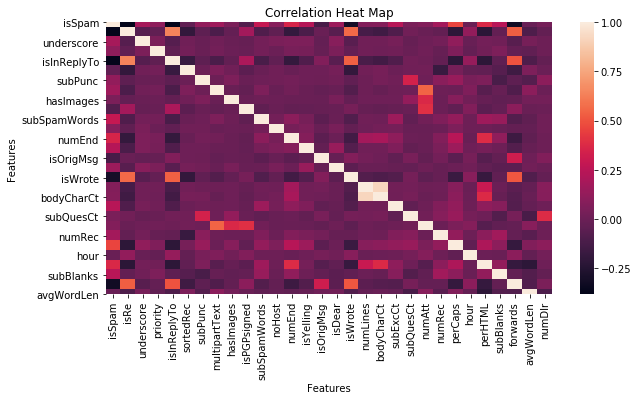

In [11]:
#Create Correlation Matrix on filtered set
corr = df_pruned.corr()

#Plot correlation Heat map
plt.figure(figsize=(10, 5))
sns.heatmap(corr)
plt.title('Correlation Heat Map')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

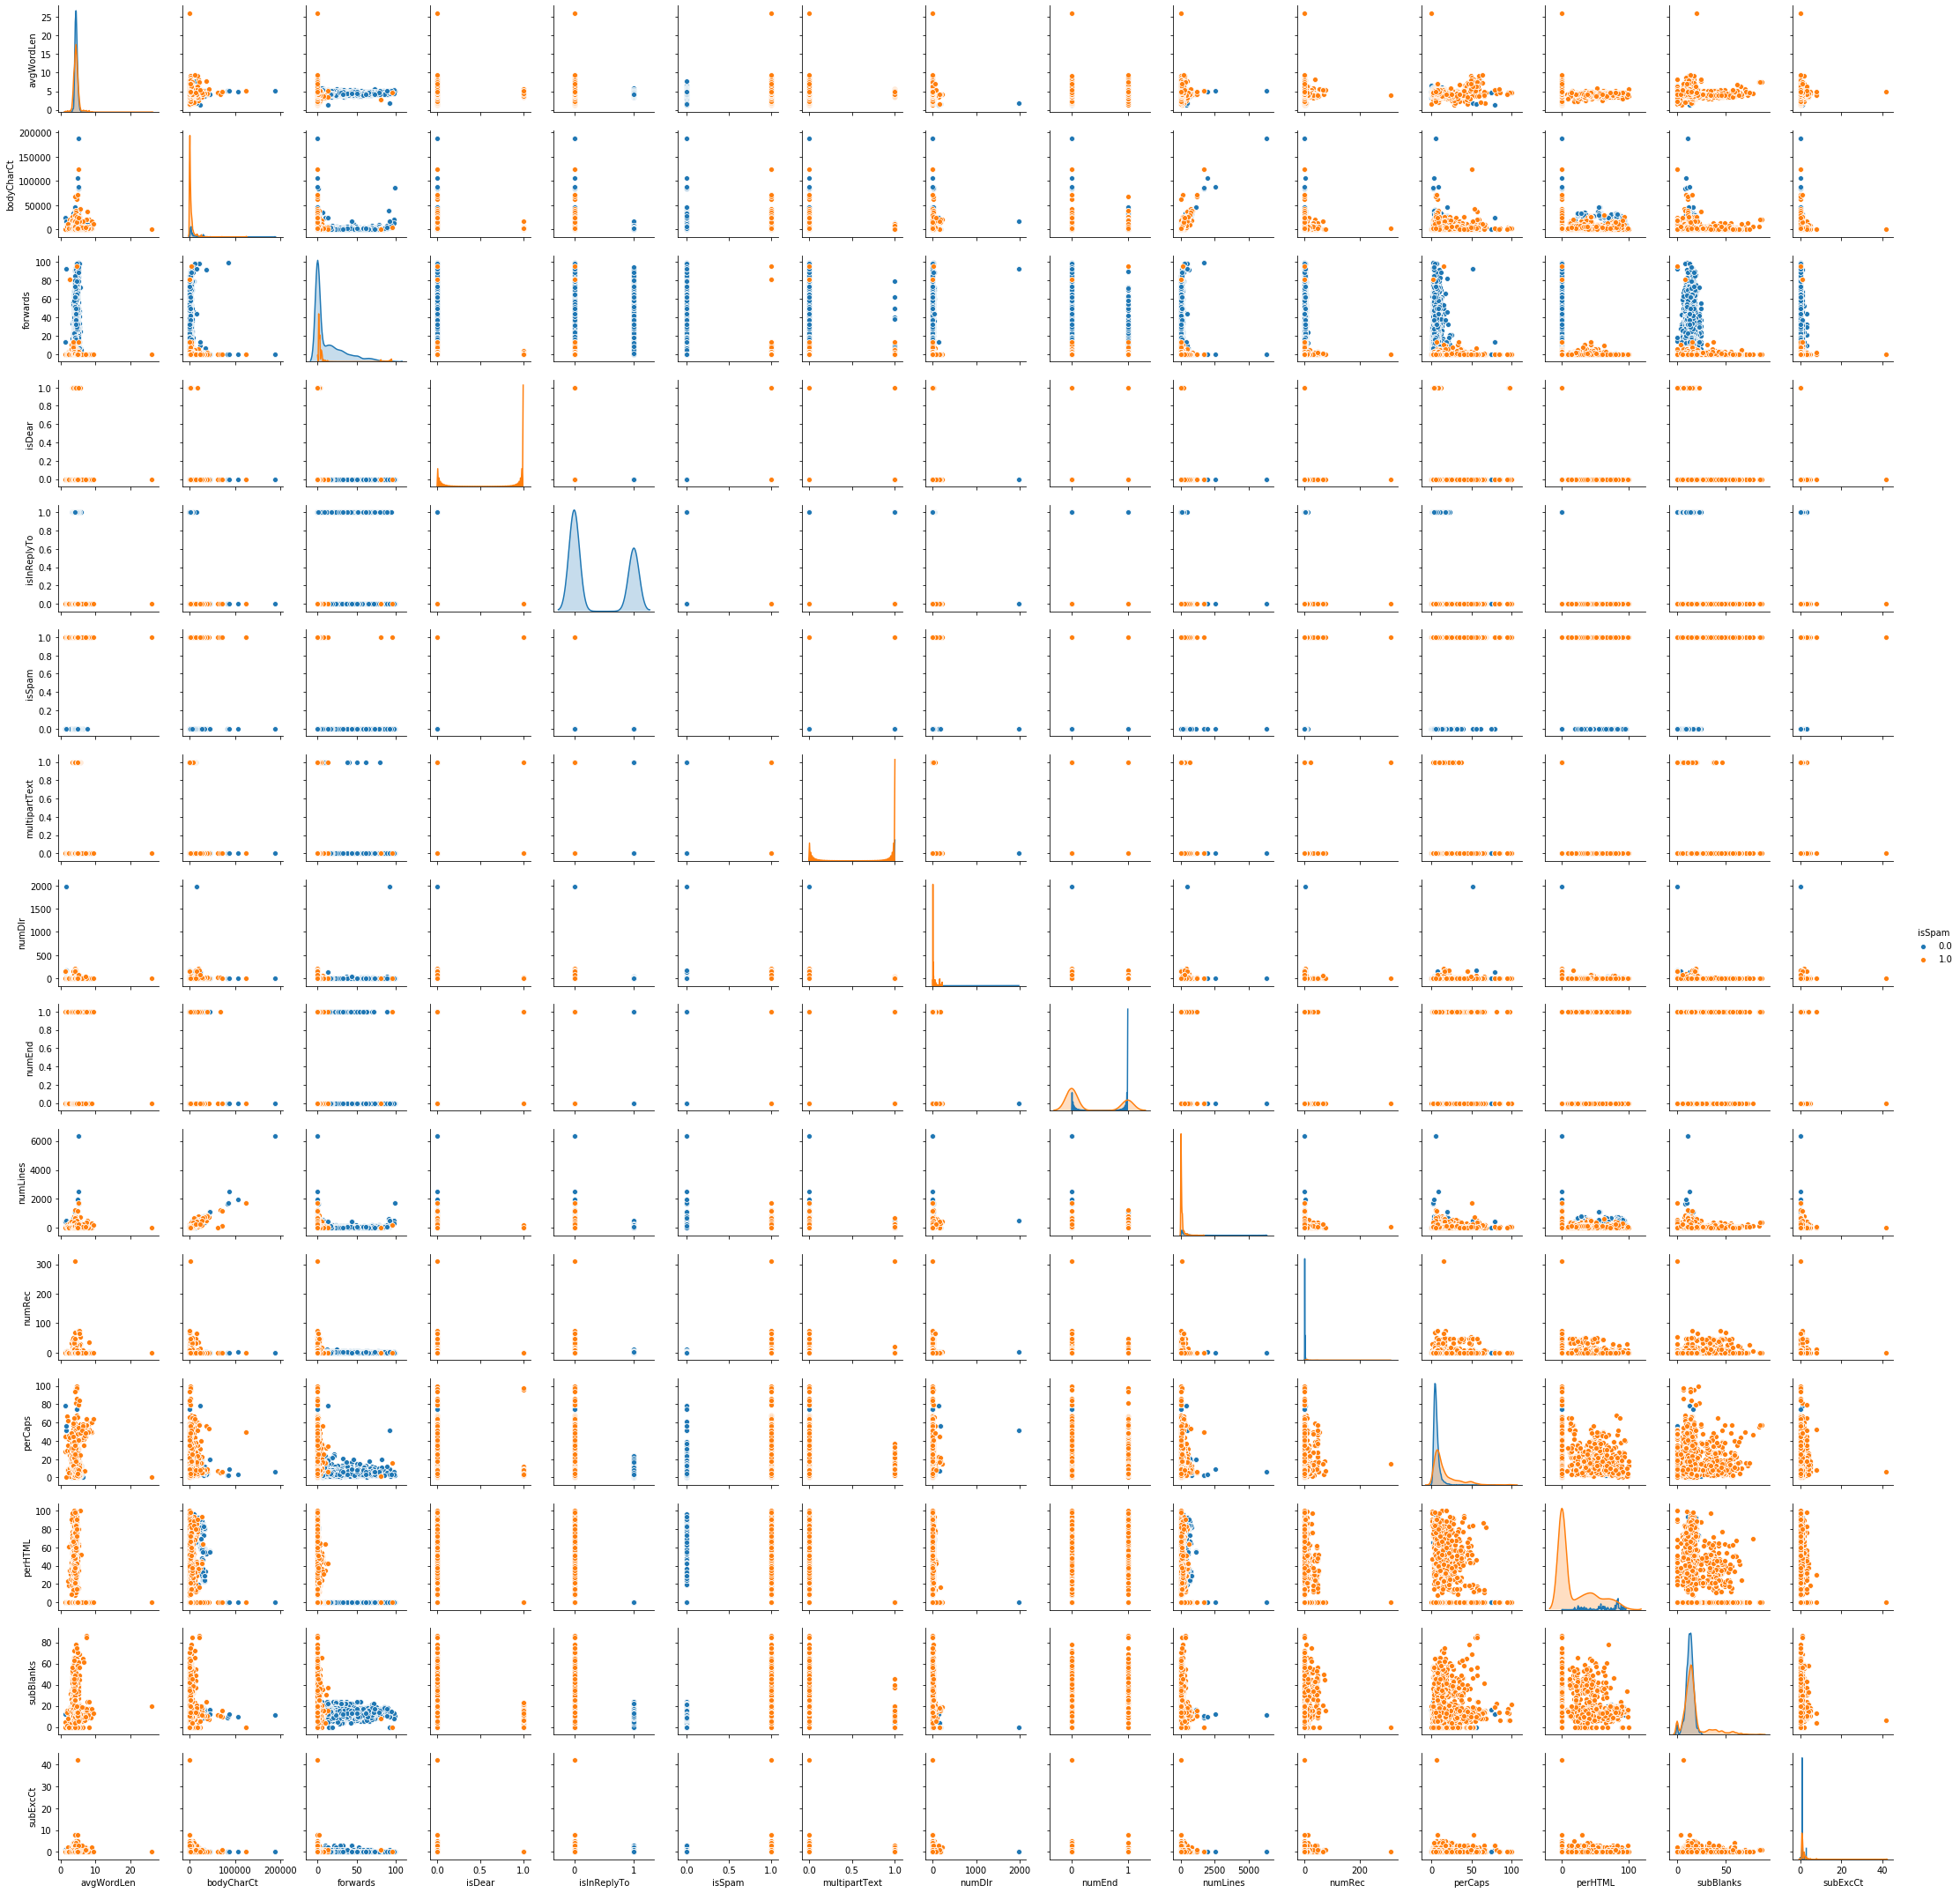

In [13]:
#Using only continous variables for SNS plot

np.seterr(divide='ignore', invalid='ignore')

df_pair = df_pruned[['avgWordLen', 'bodyCharCt', 'forwards', 'isDear'
                      ,'isInReplyTo', 'isSpam', 'multipartText', 'numDlr'
                      ,'numEnd', 'numLines', 'numRec', 'perCaps', 'perHTML'
                      ,'subBlanks', 'subExcCt']] 

sns.pairplot(data = df_pair, hue = "isSpam", height = 2)
plt.show()

# Feature Selection

## GRID SEARCH

In [14]:
label_column = 'isSpam'

features = df_pruned.dropna().drop([label_column], axis=1)

labels = df_pruned.dropna()[label_column]

X = features.values
y = labels.values

In [15]:
#Range of values to run through
max_depths = list( range(4, 31, 2) )
min_sample_splits = list( range(2, 21, 2) )

#Setting up parameters to use
params = {'max_depth':max_depths, 'min_samples_split':min_sample_splits}

#Classifier
clf = DecisionTreeClassifier()

#Grid Search
grid = GridSearchCV(clf, params, cv=10)

In [16]:
#Grid Search
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 2

In [17]:
#Identify the best parameters
best_dt = grid.best_estimator_

#Best Parameters to use for feature selection
grid.best_params_

{'max_depth': 26, 'min_samples_split': 2}

## Create Indices

### Non-Zero Importances

In [18]:
#index feature importance
feature_importances = best_dt.feature_importances_

#Get non zero indicies to filter with
nz_indices = np.argwhere(feature_importances > 0)
nz_features = features.columns[nz_indices].values.flatten()
nz_importances = feature_importances[nz_indices].flatten()

#Find the most importance features number
#nz_features[ np.argmax(nz_importances) ]
#nz_importances.max()

print("Max non-zero feature name = "+ nz_features[ np.argmax(nz_importances) ])
print("Max non-zero feature value = %s" % nz_importances.max())

Max non-zero feature name = perCaps
Max non-zero feature value = 0.2626323412560035


In [19]:
print(feature_importances.argsort()[-9:])
print([feature_importances[i] for i in [feature_importances.argsort()[-9:]]])
print('importance from the least to the most for 9 features')
print([features.columns[i] for i in feature_importances.argsort()[-9:]])

[ 3 27 26 25 28 16 24 17 22]
[array([0.03539663, 0.04134082, 0.05569062, 0.05617146, 0.06083391,
       0.09071658, 0.10368197, 0.11712829, 0.26263234])]
importance from the least to the most for 9 features
['isInReplyTo', 'avgWordLen', 'forwards', 'subBlanks', 'numDlr', 'numLines', 'perHTML', 'bodyCharCt', 'perCaps']


## Top Quartiles Analysis

In [20]:
imp = pd.Series(nz_importances)
desc = imp.describe()
desc

count    27.000000
mean      0.037037
std       0.055722
min       0.001069
25%       0.003707
50%       0.015058
75%       0.048516
max       0.262632
dtype: float64

### Function for Percent Analysis

In [21]:
#Function to run percent analysis
def rank(imp, perc, remove_outlier=True):
    if remove_outlier:
        imp = imp[imp < imp.max()]
   
    desc = imp.describe()
    if type(perc) == str:
        top = imp[ imp >=  desc[perc]]
    else:
        top = imp[ imp >= perc]
    
    # N top features
    n_top = top.shape[0]
    
    # Total variation explanation
    var_expl = top.sum() / imp.sum()
    
    return n_top, var_expl

## Save Features and Variance to Object

In [22]:
#Create variables that shows features and variances
#Number of features, fractioned explained by variance

# True (default) = removes outlier
# False = Keeps outlier

Perc25 = rank(imp, '25%', False)
Perc50 = rank(imp, '50%', False)
Perc75 = rank(imp, '75%', False)

print('Features & Variance')
print('')
print(f'25% Quartile include {Perc25[0]} features and explains {round(Perc25[1]*100, 3)}% of the variance')
print(f'50% Quartile include {Perc50[0]} features and explains {round(Perc50[1]*100, 3)}% of the variance')
print(f'75% Quartile include {Perc75[0]} features and explains {round(Perc75[1]*100, 3)}% of the variance')

Features & Variance

25% Quartile include 20 features and explains 98.776% of the variance
50% Quartile include 14 features and explains 93.541% of the variance
75% Quartile include 7 features and explains 74.686% of the variance


### Top Features for use

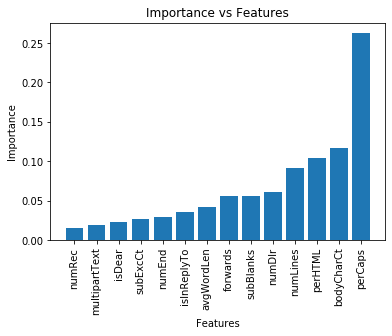

In [23]:
#Apply threshold to only use top features
threshold = desc['50%'] #Top 75% quartile

# Get all features with importance greater than the threshold
top_indices = np.argwhere(nz_importances >= threshold)
top_features = nz_features[top_indices].flatten()
top_importances = nz_importances[top_indices].flatten()

#Sort the data
sorted_indices = np.argsort(top_importances)
sorted_features = top_features[sorted_indices]
sorted_importances = top_importances[sorted_indices]

#Plot the sorted values
plt.xticks(rotation=90)
plt.bar(sorted_features, sorted_importances)#, log=True)

#Plot Data
plt.title('Importance vs Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [24]:
sorted_features

array(['numRec', 'multipartText', 'isDear', 'subExcCt', 'numEnd',
       'isInReplyTo', 'avgWordLen', 'forwards', 'subBlanks', 'numDlr',
       'numLines', 'perHTML', 'bodyCharCt', 'perCaps'], dtype=object)

# Modeling

In [25]:
### Selecting the most promising features ###

def top_X(n):
    if n>28:
        print("number of features is at most 29")
        return 
    else:
        return features[[features.columns[i] for i in feature_importances.argsort()[-n-1:]]]

X = top_X(14) #explains %94 of variance                
y = labels                     


In [26]:
### Train test splitting ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
### fitting a random forest model with the best parameters that we found in feature imporatance ###


#model = RandomForestClassifier(n_estimators=100, max_depth=5, min_impurity_split=None, min_samples_split=1000)
model = RandomForestClassifier(n_estimators=100, max_depth=26, min_samples_split=2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=26, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
#model.estimators_
decision_tree = model.estimators_[0]
#decision_tree.fit(X_train, y_train)


###Uncomment if you want to see an example of one tree:
"""

fn=X.columns.values
cn= ['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(decision_tree, feature_names = fn, class_names=cn, filled = True);
tree.plot_tree(decision_tree)
plt.show()
fig.savefig('first_example_tree.png')

"""

"\n\nfn=X.columns.values\ncn= ['0','1']\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)\ntree.plot_tree(decision_tree, feature_names = fn, class_names=cn, filled = True);\ntree.plot_tree(decision_tree)\nplt.show()\nfig.savefig('first_example_tree.png')\n\n"

In [29]:
### precision, recall, f-score ###


y_pred = model.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='macro')


(0.9747408317353787, 0.9676990021996239, 0.9711518775403335, None)

# Tuning some parameteres for RANDOM FOREST 

In [30]:
### Tuning the number of estimators ### 
n_est = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
score = []
for n in n_est:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    y_pred1 = clf.predict(X_test)
    score.append(precision_recall_fscore_support(y_test, y_pred1, average='macro'))
    

In [31]:
for i in range(9):
    print('number of estimators', 2*2**i, ':', score[i])

number of estimators 2 : (0.9171933489094897, 0.9117405364815228, 0.9144184433858629, None)
number of estimators 4 : (0.941449551908301, 0.8897841464148966, 0.9117779380809088, None)
number of estimators 8 : (0.9530877205693142, 0.9282545400448425, 0.9397906287189624, None)
number of estimators 16 : (0.9652876310638638, 0.9530011936767013, 0.9589331409642143, None)
number of estimators 32 : (0.9730589295212044, 0.9631058263466055, 0.9679463087248321, None)
number of estimators 64 : (0.9705605254607506, 0.9685243038952115, 0.9695366220933405, None)
number of estimators 128 : (0.9689280062585678, 0.9656747107016481, 0.9672865278964211, None)
number of estimators 256 : (0.9726294513909832, 0.9681116530474176, 0.9703422926069939, None)
number of estimators 512 : (0.9731191720572906, 0.9694239890054229, 0.9712526808236379, None)


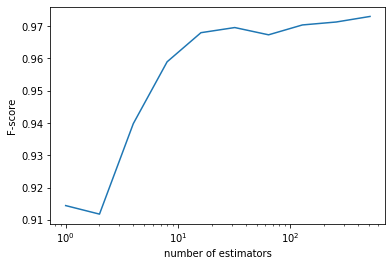

In [32]:
plt.plot(n_est, list(map(lambda x:x[2], score)))
plt.xlabel('number of estimators')
plt.ylabel('F-score')
plt.xscale('log')
plt.savefig('tune-n-estimator.png')
plt.show()

In [33]:
### Tuning max depth ### (we already found that 30 is the best)
maxdept = np.linspace(2, 64, 32, endpoint=True)
score2 = []
for m in maxdept:
    clf = RandomForestClassifier(max_depth=m)
    clf.fit(X_train, y_train)
    y_pred1 = clf.predict(X_test)
    score2.append(precision_recall_fscore_support(y_test, y_pred1, average='macro'))
    

In [34]:
for i in range(32):
    print('max depth', 2*(i+1), ':', score2[i])

max depth 2 : (0.8843158955364869, 0.694545393364291, 0.7306050270899762, None)
max depth 4 : (0.9169148110297347, 0.8125998420237956, 0.8484959789927247, None)
max depth 6 : (0.934514005600281, 0.8666119417259077, 0.893883146238655, None)
max depth 8 : (0.9411024537247652, 0.8961023090737139, 0.9156699032502021, None)
max depth 10 : (0.9485859685043664, 0.9273362590809753, 0.9373053517897851, None)
max depth 12 : (0.9571552391270701, 0.9359222303689771, 0.9458998685406073, None)
max depth 14 : (0.9677746514518806, 0.9451829654896378, 0.9557777777777778, None)
max depth 16 : (0.96995270064083, 0.9545756426195713, 0.9619387056024695, None)
max depth 18 : (0.973004126534135, 0.9613622436871505, 0.9669973752088717, None)
max depth 20 : (0.9748107713556312, 0.9631244222002614, 0.9687813008732571, None)
max depth 22 : (0.9716515750221619, 0.9654869811314071, 0.968516629432105, None)
max depth 24 : (0.9767095113518788, 0.9683737660322824, 0.972446963344799, None)
max depth 26 : (0.9756351869

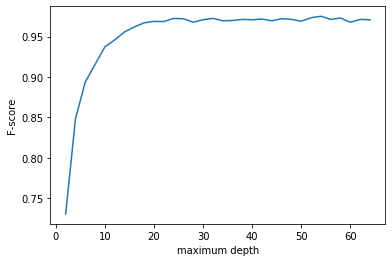

In [35]:
plt.plot(maxdept, list(map(lambda x:x[2], score2)))
plt.xlabel('maximum depth')
plt.ylabel('F-score')
plt.savefig('tune-max-depth.png')
plt.show()

In [36]:
### Tuning min sample split###
minsamplessplits = np.linspace(0.01, 0.2, 20, endpoint=True)
score3 = []
for m in minsamplessplits:
    clf = RandomForestClassifier(min_samples_split=m)
    clf.fit(X_train, y_train)
    y_pred1 = clf.predict(X_test)
    score3.append(precision_recall_fscore_support(y_test, y_pred1, average='macro'))

In [37]:
for i in range(20):
    print('min sample split', round(0.01 *(i+1),2), ':', score3[i])

min sample split 0.01 : (0.9445139733120607, 0.9394855501361925, 0.9419618321143193, None)
min sample split 0.02 : (0.9245283855706683, 0.9237950772347788, 0.9241608684143354, None)
min sample split 0.03 : (0.9260538491196504, 0.9227262584079824, 0.9243724372437244, None)
min sample split 0.04 : (0.9134536656459299, 0.9173467436003697, 0.9153748131718011, None)
min sample split 0.05 : (0.9065237454088942, 0.9113854442283783, 0.908914009943055, None)
min sample split 0.06 : (0.9092783960431019, 0.9103352212552378, 0.9098049203908757, None)
min sample split 0.07 : (0.8846990403057862, 0.8976076877030048, 0.8908399729269434, None)
min sample split 0.08 : (0.8858059791505126, 0.8965388688762083, 0.89095757105801, None)
min sample split 0.09 : (0.8825175077611724, 0.8941019265304389, 0.8880559916274202, None)
min sample split 0.1 : (0.8832503456690656, 0.8897708636622851, 0.8864312154508568, None)
min sample split 0.11 : (0.8760984224241559, 0.8764225828046798, 0.8762603035276328, None)
min

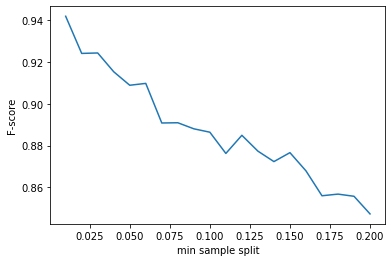

In [38]:
plt.plot(minsamplessplits,list(map(lambda x:x[2], score3)))
plt.xlabel('min sample split')
plt.ylabel('F-score')
plt.savefig('min-sample-split-tune.png')
plt.show()

In [63]:
### Tuning min sample leafs###
minsamplesleafs = np.linspace(0.01, 0.2, 20, endpoint=True)
score4 = []
for m in minsamplesleafs:
    clf = RandomForestClassifier(min_samples_leaf=m)
    clf.fit(X_train, y_train)
    y_pred1 = clf.predict(X_test)
    score4.append(precision_recall_fscore_support(y_test, y_pred1, average='macro'))

In [61]:
for i in range(20):
    print('min sample leafs', round(0.01 *(i+1),2), ':', score4[i])

min sample leafs 0.01 : (0.9105336506100625, 0.8578957994623142, 0.8798455804381762, None)
min sample leafs 0.02 : (0.9015436881364804, 0.8188064295606774, 0.8493193875508979, None)
min sample leafs 0.03 : (0.8560766502318948, 0.7759323606816354, 0.8040930330117988, None)
min sample leafs 0.04 : (0.8424039484962371, 0.7575224655622501, 0.7859457112095707, None)
min sample leafs 0.05 : (0.8401503755702375, 0.7450924656685121, 0.7749924662939705, None)
min sample leafs 0.06 : (0.8393613613541557, 0.7226508123731498, 0.7545941335587254, None)
min sample leafs 0.07 : (0.8304372078945886, 0.7217139355556264, 0.7522692548093618, None)
min sample leafs 0.08 : (0.850292836243016, 0.6734364429142713, 0.7041043353290501, None)
min sample leafs 0.09 : (0.8470420729886606, 0.6125243959889629, 0.6254423792161936, None)
min sample leafs 0.1 : (0.8489108321027247, 0.629997414290825, 0.6497266318740526, None)
min sample leafs 0.11 : (0.8307057967499394, 0.5740540023590169, 0.5669174670446102, None)
mi

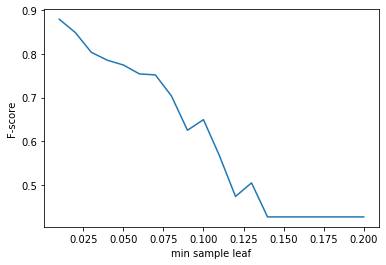

In [62]:

plt.plot(minsamplesleafs,list(map(lambda x:x[2], score4)))
plt.xlabel('min sample leaf')
plt.ylabel('F-score')
plt.savefig('min-sample-leaf-tune.png')
plt.show()


In [49]:
### The result with best parameters ### 
clf = RandomForestClassifier(n_estimators=64, max_depth=28)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print(precision_recall_fscore_support(y_test, y_pred1, average='macro'))

(0.9739225944670413, 0.9685614956025234, 0.9712024357819141, None)


# Visualization and understanding

In [50]:
#model.estimators_
decision_tree2 = clf.estimators_[0]
#decision_tree.fit(X_train, y_train)
"""
fn=X.columns.values
cn= ['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=800)
tree.plot_tree(decision_tree2, feature_names = fn, class_names=cn, filled = True);
tree.plot_tree(decision_tree2)
#It is heavy if you want to show the tree here. It is better just to save it. 
#plt.show()
fig.savefig('last_example_tree.png')
"""

"\nfn=X.columns.values\ncn= ['0','1']\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=800)\ntree.plot_tree(decision_tree2, feature_names = fn, class_names=cn, filled = True);\ntree.plot_tree(decision_tree2)\n#It is heavy if you want to show the tree here. It is better just to save it. \n#plt.show()\nfig.savefig('last_example_tree.png')\n"

[Text(251.10000000000002, 317.09999999999997, 'X[12] <= 4.237\ngini = 0.394\nsamples = 3858\nvalue = [4426, 1634]'),
 Text(125.55000000000001, 190.26, 'X[10] <= 0.5\ngini = 0.308\nsamples = 3354\nvalue = [4266, 1001]'),
 Text(62.775000000000006, 63.420000000000016, '\n  (...)  \n'),
 Text(188.32500000000002, 63.420000000000016, '\n  (...)  \n'),
 Text(376.65000000000003, 190.26, 'X[12] <= 80.831\ngini = 0.322\nsamples = 504\nvalue = [160, 633]'),
 Text(313.875, 63.420000000000016, '\n  (...)  \n'),
 Text(439.42500000000007, 63.420000000000016, '\n  (...)  \n')]

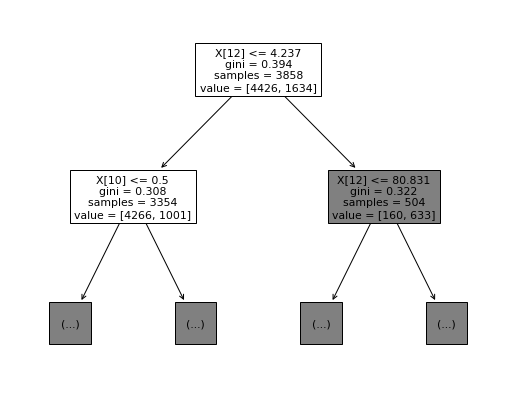

In [51]:
from sklearn import tree
plt.figure(figsize=(9,7))
tree.plot_tree(clf.estimators_[13], max_depth=1)

In [52]:
### sum of feature importance for each tree
fi = np.zeros(15)
for tree in clf.estimators_:
    fi += tree.feature_importances_
print(fi/64)

[0.02003936 0.03537186 0.0253628  0.01713083 0.05122672 0.04309135
 0.04414166 0.06440424 0.08014047 0.07768531 0.04548419 0.09145216
 0.10420052 0.10494053 0.19532801]


In [53]:
### The occurance of features in the first node. 

fr = np.zeros(15)
for tree in clf.estimators_:
    if tree.tree_.feature[0]>-1:
        fr[tree.tree_.feature[0]] += 1
d = {}
for i in range(15):
    d[X_train.columns[i]] = fr[i]

print(d)



{'isYelling': 0.0, 'numRec': 1.0, 'multipartText': 0.0, 'isDear': 0.0, 'subExcCt': 5.0, 'numEnd': 3.0, 'isInReplyTo': 7.0, 'avgWordLen': 0.0, 'forwards': 13.0, 'subBlanks': 4.0, 'numDlr': 3.0, 'numLines': 0.0, 'perHTML': 11.0, 'bodyCharCt': 0.0, 'perCaps': 17.0}


In [54]:
### The occurance of features in depth 1,2:
fr = np.zeros(15)
for tree in clf.estimators_:
    i = tree.tree_.children_left[0]
    j = tree.tree_.children_left[1]
    k = tree.tree_.children_right[0]
    if i>0:
        fr[tree.tree_.feature[i]] += 1
    if j>0:
        fr[tree.tree_.feature[j]] += 1
    if k>0:
        fr[tree.tree_.feature[k]] += 1
d = {}
for i in range(15):
    d[X_train.columns[i]] = fr[i]

print(d)
    


{'isYelling': 9.0, 'numRec': 10.0, 'multipartText': 2.0, 'isDear': 0.0, 'subExcCt': 14.0, 'numEnd': 12.0, 'isInReplyTo': 12.0, 'avgWordLen': 6.0, 'forwards': 16.0, 'subBlanks': 15.0, 'numDlr': 9.0, 'numLines': 12.0, 'perHTML': 22.0, 'bodyCharCt': 27.0, 'perCaps': 26.0}


In [55]:
n_nodes = decision_tree2.tree_.node_count
children_left = decision_tree2.tree_.children_left
children_right = decision_tree2.tree_.children_right
feature = decision_tree2.tree_.feature
threshold = decision_tree2.tree_.threshold

[Text(558.0, 475.65000000000003, 'X[12] <= 4.237\ngini = 0.394\nsamples = 3831\nvalue = [4426, 1634]'),
 Text(279.0, 339.75, 'X[14] <= 22.264\ngini = 0.301\nsamples = 3321\nvalue = [4250, 964]'),
 Text(139.5, 203.85000000000002, 'X[5] <= 0.5\ngini = 0.261\nsamples = 3174\nvalue = [4224, 769]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'X[9] <= 10.471\ngini = 0.208\nsamples = 147\nvalue = [26, 195]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'X[11] <= 298.5\ngini = 0.33\nsamples = 510\nvalue = [176, 670]'),
 Text(697.5, 203.85000000000002, 'X[13] <= 9503.0\ngini = 0.053\nsamples = 391\nvalue = [18, 641]'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'X[13] <= 18919.5\ngini = 0.262\nsamples = 119\nvalue = [158, 29]'),
 Text(90

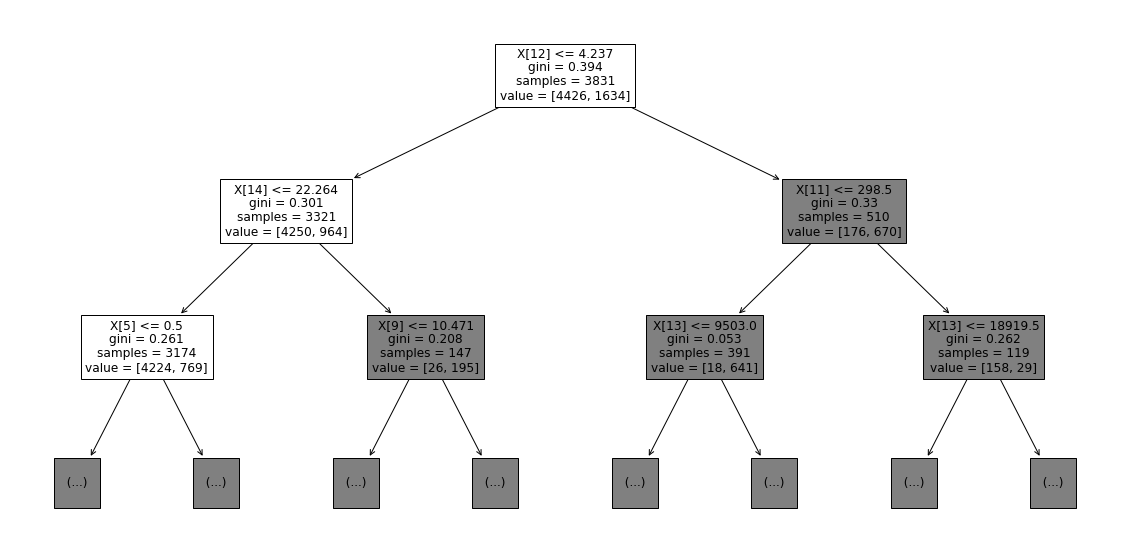

In [57]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree2, max_depth=2)

In [58]:
### Understanding the tree

def get_lineage(tree, feature_names):
     left  = tree.tree_.children_left
     right = tree.tree_.children_right
     threshold = tree.tree_.threshold
     features = [feature_names[i] for i in tree.tree_.feature]

     # get ids of child nodes
     idx = np.argwhere(left == -1)[:,0]     

     def recurse(left, right, child, lineage=None):          
          if lineage is None:
               lineage = [child]
          if child in left:
               parent = np.where(left == child)[0].item()
               split = 'l'
          else:
               parent = np.where(right == child)[0].item()
               split = 'r'

          lineage.append((parent, split, threshold[parent], features[parent]))

          if parent == 0:
               lineage.reverse()
               return lineage
          else:
               return recurse(left, right, parent, lineage)

     for child in idx:
          for node in recurse(left, right, child):
               print( node)



In [59]:
get_lineage(decision_tree2, X_train.columns)

(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'l', 0.5, 'numEnd')
(3, 'l', 0.5, 'isDear')
(4, 'l', 0.5, 'numDlr')
(5, 'l', 0.5, 'isYelling')
(6, 'l', 0.5, 'subExcCt')
(7, 'l', 0.5, 'isInReplyTo')
(8, 'l', 26.844584465026855, 'subBlanks')
(9, 'l', 4.5, 'numRec')
(10, 'l', 30.5, 'numLines')
(11, 'l', 1304.0, 'bodyCharCt')
(12, 'l', 12.515984535217285, 'perCaps')
(13, 'l', 2.632575750350952, 'avgWordLen')
14
(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'l', 0.5, 'numEnd')
(3, 'l', 0.5, 'isDear')
(4, 'l', 0.5, 'numDlr')
(5, 'l', 0.5, 'isYelling')
(6, 'l', 0.5, 'subExcCt')
(7, 'l', 0.5, 'isInReplyTo')
(8, 'l', 26.844584465026855, 'subBlanks')
(9, 'l', 4.5, 'numRec')
(10, 'l', 30.5, 'numLines')
(11, 'l', 1304.0, 'bodyCharCt')
(12, 'l', 12.515984535217285, 'perCaps')
(13, 'r', 2.632575750350952, 'avgWordLen')
(15, 'l', 4.229670286178589, 'avgWordLen')
(16, 'l', 3.3383991718292236, 'perCaps')
(17, 'l', 3.318318247795105

(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'l', 0.5, 'numEnd')
(3, 'l', 0.5, 'isDear')
(4, 'l', 0.5, 'numDlr')
(5, 'l', 0.5, 'isYelling')
(6, 'l', 0.5, 'subExcCt')
(7, 'l', 0.5, 'isInReplyTo')
(8, 'l', 26.844584465026855, 'subBlanks')
(9, 'l', 4.5, 'numRec')
(10, 'r', 30.5, 'numLines')
(106, 'l', 0.5, 'multipartText')
(107, 'l', 13.423423290252686, 'subBlanks')
(108, 'r', 34.5, 'numLines')
(124, 'r', 824.0, 'bodyCharCt')
(126, 'r', 5.178571462631226, 'subBlanks')
(136, 'l', 113.5, 'numLines')
(137, 'l', 1.5, 'numRec')
(138, 'r', 1102.5, 'bodyCharCt')
(146, 'l', 1788.5, 'bodyCharCt')
(147, 'l', 11.696306228637695, 'subBlanks')
(148, 'l', 5.2318220138549805, 'avgWordLen')
(149, 'l', 4.45939040184021, 'avgWordLen')
(150, 'r', 55.5, 'numLines')
152
(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'l', 0.5, 'numEnd')
(3, 'l', 0.5, 'isDear')
(4, 'l', 0.5, 'numDlr')
(5, 'l', 0.5, 'isYelling')
(6, 'l', 0.5, 'subExcCt')
(

(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'l', 0.5, 'numEnd')
(3, 'l', 0.5, 'isDear')
(4, 'l', 0.5, 'numDlr')
(5, 'l', 0.5, 'isYelling')
(6, 'l', 0.5, 'subExcCt')
(7, 'l', 0.5, 'isInReplyTo')
(8, 'l', 26.844584465026855, 'subBlanks')
(9, 'l', 4.5, 'numRec')
(10, 'r', 30.5, 'numLines')
(106, 'l', 0.5, 'multipartText')
(107, 'r', 13.423423290252686, 'subBlanks')
(163, 'r', 0.5, 'numRec')
(169, 'l', 5.316736459732056, 'avgWordLen')
(170, 'r', 11.117449283599854, 'perCaps')
(226, 'l', 43.131314277648926, 'forwards')
(227, 'l', 2.222222328186035, 'forwards')
(228, 'r', 12.81680679321289, 'perCaps')
(230, 'r', 42.0, 'numLines')
(232, 'r', 4.628108263015747, 'avgWordLen')
234
(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'l', 0.5, 'numEnd')
(3, 'l', 0.5, 'isDear')
(4, 'l', 0.5, 'numDlr')
(5, 'l', 0.5, 'isYelling')
(6, 'l', 0.5, 'subExcCt')
(7, 'l', 0.5, 'isInReplyTo')
(8, 'l', 26.844584465026855, 'subBlanks')
(9, 'l

(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'l', 0.5, 'numEnd')
(3, 'l', 0.5, 'isDear')
(4, 'r', 0.5, 'numDlr')
(344, 'l', 43.0, 'numDlr')
(345, 'l', 0.5, 'isInReplyTo')
(346, 'l', 0.5, 'subExcCt')
(347, 'l', 3.37850558757782, 'forwards')
(348, 'l', 86.0, 'numLines')
(349, 'l', 0.5, 'isYelling')
(350, 'l', 1.25, 'forwards')
(351, 'l', 0.5, 'multipartText')
(352, 'r', 1.7949258089065552, 'perCaps')
(354, 'r', 0.5, 'numRec')
(356, 'r', 24.5, 'numLines')
(364, 'l', 4.6252171993255615, 'avgWordLen')
(365, 'l', 73.5, 'numLines')
(366, 'r', 5.5, 'numRec')
380
(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'l', 0.5, 'numEnd')
(3, 'l', 0.5, 'isDear')
(4, 'r', 0.5, 'numDlr')
(344, 'l', 43.0, 'numDlr')
(345, 'l', 0.5, 'isInReplyTo')
(346, 'l', 0.5, 'subExcCt')
(347, 'l', 3.37850558757782, 'forwards')
(348, 'l', 86.0, 'numLines')
(349, 'l', 0.5, 'isYelling')
(350, 'l', 1.25, 'forwards')
(351, 'l', 0.5, 'multipartText')
(35

(524, 'l', 4.501726865768433, 'avgWordLen')
(525, 'l', 7.706266641616821, 'perCaps')
(526, 'r', 11.054766654968262, 'subBlanks')
528
(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'r', 0.5, 'numEnd')
(462, 'r', 0.5, 'numDlr')
(510, 'l', 141.0, 'numLines')
(511, 'l', 16.37147331237793, 'subBlanks')
(512, 'l', 97.5, 'numLines')
(513, 'r', 4.776317119598389, 'perCaps')
(521, 'l', 1232.5, 'bodyCharCt')
(522, 'l', 4.5, 'numDlr')
(523, 'l', 0.5, 'subExcCt')
(524, 'l', 4.501726865768433, 'avgWordLen')
(525, 'r', 7.706266641616821, 'perCaps')
529
(0, 'l', 4.237287998199463, 'perHTML')
(1, 'l', 22.264273643493652, 'perCaps')
(2, 'r', 0.5, 'numEnd')
(462, 'r', 0.5, 'numDlr')
(510, 'l', 141.0, 'numLines')
(511, 'l', 16.37147331237793, 'subBlanks')
(512, 'l', 97.5, 'numLines')
(513, 'r', 4.776317119598389, 'perCaps')
(521, 'l', 1232.5, 'bodyCharCt')
(522, 'l', 4.5, 'numDlr')
(523, 'l', 0.5, 'subExcCt')
(524, 'r', 4.501726865768433, 'avgWordLen')
530
(0, 'l', 4.2